In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from datetime import timedelta
from dateutil.parser import parse
from datetime import datetime
from pandas.tseries.offsets import Hour, Minute
from pandas.tseries.offsets import Day, MonthEnd
import pytz
from pandas.tseries.offsets import Hour
from pandas.tseries.frequencies import to_offset
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf


In [2]:
#df = pd.read_csv('Wind_deseason.csv')
df = pd.read_csv('Wind_deseason.csv', parse_dates=[0], index_col=0)

In [3]:
#AR model
from statsmodels.tsa.ar_model import AutoReg, ar_select_order

<Axes: xlabel='Date'>

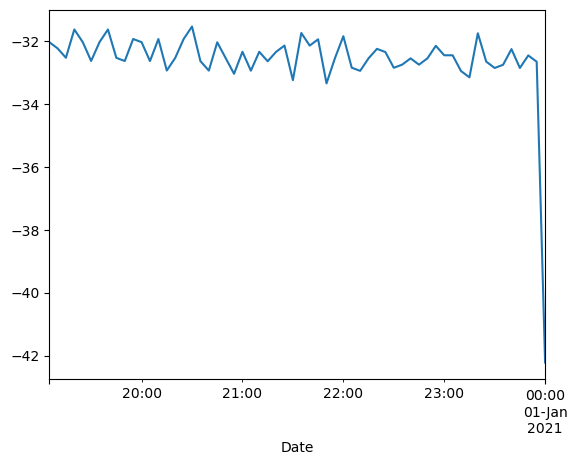

In [4]:
df['309_WIND_1'].iloc[len(df)-60:].plot()

In [5]:
print(df.shape)
train=df.iloc[:len(df)-4]
test=df.iloc[len(df)-4:]
print(train.shape,test.shape)

(105408, 8)
(105404, 8) (4, 8)


In [14]:
mod = ARIMA(train['309_WIND_1'], order = (5,1,5))
res = mod.fit()
print(res.summary())


C:\Users\bvits\anaconda3\envs\modern_ts\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 5T will be used.
  self._init_dates(dates, freq)
C:\Users\bvits\anaconda3\envs\modern_ts\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 5T will be used.
  self._init_dates(dates, freq)
C:\Users\bvits\anaconda3\envs\modern_ts\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 5T will be used.
  self._init_dates(dates, freq)
C:\Users\bvits\anaconda3\envs\modern_ts\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:             309_WIND_1   No. Observations:               105404
Model:                 ARIMA(5, 1, 5)   Log Likelihood             -242537.275
Date:                Mon, 01 May 2023   AIC                         485096.551
Time:                        16:37:11   BIC                         485201.772
Sample:                    01-01-2020   HQIC                        485128.407
                         - 12-31-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0507      0.012     84.422      0.000       1.026       1.075
ar.L2          0.2725      0.019     14.397      0.000       0.235       0.310
ar.L3         -0.6651      0.016    -40.608      0.0

In [15]:
start = len(train)
end = len(train)+len(test)-1
pred = res.predict(start = start, end = end)


<Axes: xlabel='Date'>

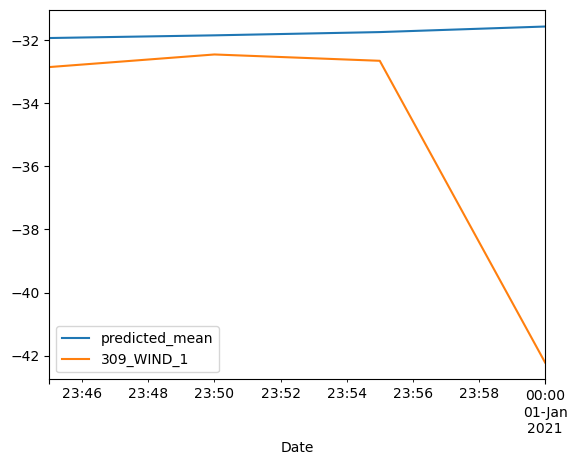

In [16]:

pred.plot(legend=True)
test['309_WIND_1'].iloc[:31].plot(legend=True)


In [17]:
print(res.mle_retvals)

{'fopt': 2.3010253438253265, 'gopt': array([-0.00047131,  0.00029905, -0.00369991,  0.00072961,  0.00227691,
        0.00125915, -0.00035052,  0.00252633,  0.00252568, -0.00187138,
        0.00193042]), 'fcalls': 708, 'warnflag': 1, 'converged': False, 'iterations': 50}


In [23]:
from sklearn.metrics import mean_squared_error


mean_squared_error(pred[0:4], test['309_WIND_1'][0:4])

0.6809152996857907

In [6]:
mod = ARIMA(train['309_WIND_1'], order = (3,0,20))
res = mod.fit()
print(res.summary())

C:\Users\bvits\anaconda3\envs\modern_ts\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 5T will be used.
  self._init_dates(dates, freq)
C:\Users\bvits\anaconda3\envs\modern_ts\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 5T will be used.
  self._init_dates(dates, freq)
C:\Users\bvits\anaconda3\envs\modern_ts\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 5T will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:             309_WIND_1   No. Observations:               105404
Model:                ARIMA(3, 0, 20)   Log Likelihood             -242436.720
Date:                Tue, 02 May 2023   AIC                         484923.439
Time:                        17:15:44   BIC                         485162.578
Sample:                    01-01-2020   HQIC                        484995.841
                         - 12-31-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.7737      2.478      3.945      0.000       4.918      14.630
ar.L1          1.8651      0.555      3.363      0.001       0.778       2.952
ar.L2         -1.2708      0.794     -1.601      0.1

In [7]:
start = len(train)
end = len(train)+len(test)-1
pred = res.predict(start = start, end = end)

<Axes: xlabel='Date'>

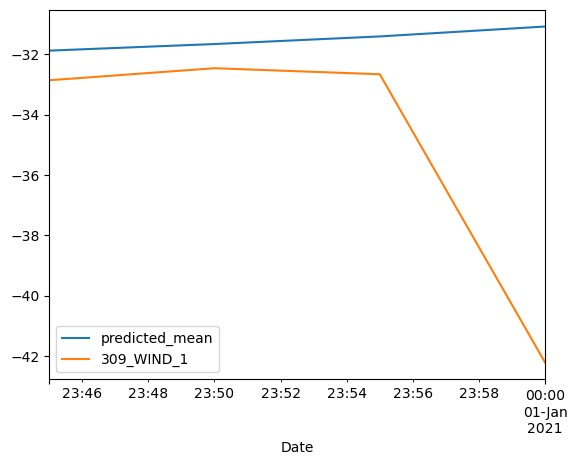

In [8]:
pred.plot(legend=True)
test['309_WIND_1'].iloc[:31].plot(legend=True)


In [9]:
print(res.mle_retvals)

{'fopt': 2.300071341925863, 'gopt': array([-2.51798582e-08, -8.24007529e-07, -6.60052013e-05, -1.21080923e-06,
       -8.41575698e-05, -1.11424336e-04, -7.49292628e-05, -1.34371181e-05,
       -1.03191233e-05, -1.67471814e-05, -2.19960494e-05, -1.47217349e-05,
       -4.18332036e-06, -8.28817015e-06, -4.37228032e-06, -1.82520665e-08,
        2.58877364e-06,  1.98916439e-06, -2.82960322e-06, -1.27378108e-05,
       -1.00050190e-05,  2.66071609e-06,  1.27267974e-05,  3.00763414e-05,
       -4.12550438e-05]), 'fcalls': 156, 'warnflag': 0, 'converged': True, 'iterations': 4}


In [11]:
from sklearn.metrics import mean_squared_error
mean_squared_error(pred[0:4], test['309_WIND_1'][0:4])

31.842161776596647